In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('US_Accidents_June20.csv')

In [5]:
df = df[df.Source=="MapQuest"]
df = df.drop(columns=['Source'])

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Wind_Direction'>

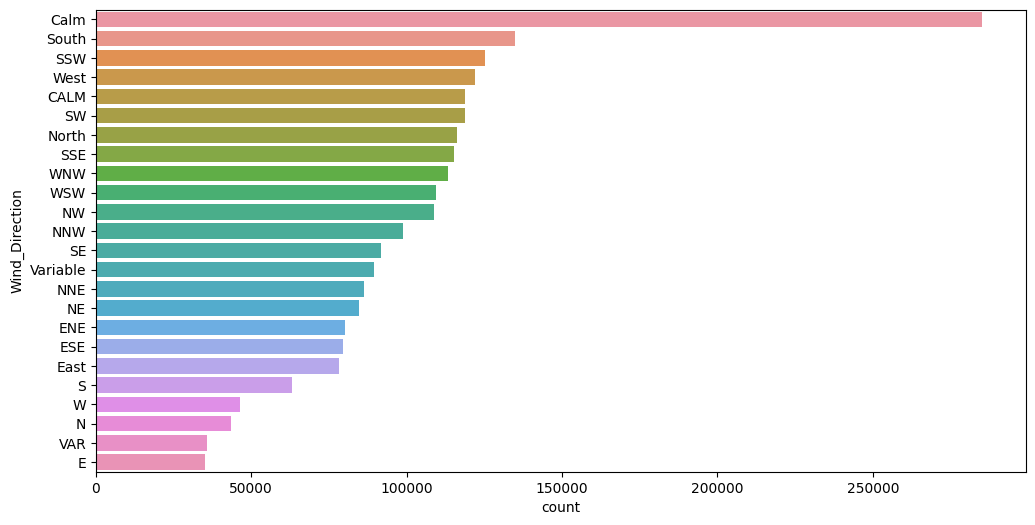

In [8]:
fig = plt.figure(figsize = (12, 6))
sns.countplot(y='Wind_Direction', data=df, order=df['Wind_Direction'].value_counts().index)

#**Top 5 Weather Conditions contributing to an accident (pie plot)**

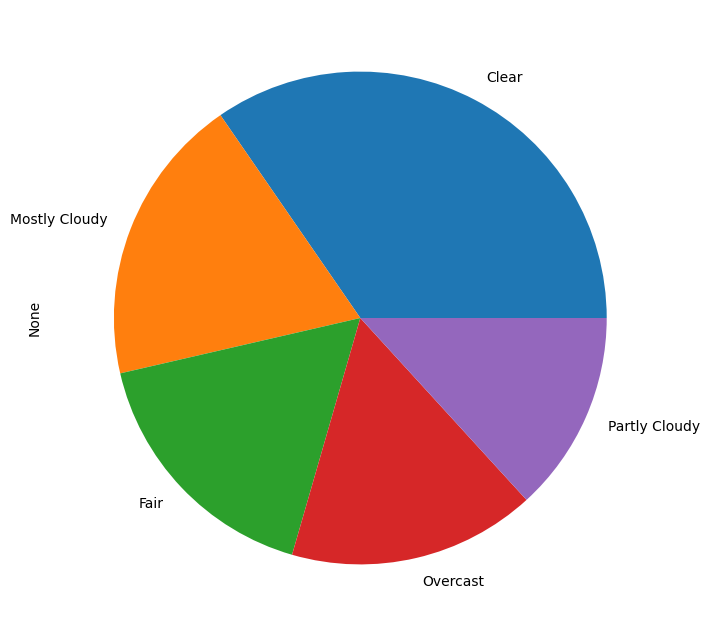

In [9]:
plt.figure(figsize=(14,8))
df.groupby('Weather_Condition').size().sort_values(ascending = False).iloc[:5].plot.pie()
plt.ioff()

##**Interpretation:**
Many indicators.
All are categorical data.
So accidents can be analyzed based on the weather with very great accuracy. 

Though most accidents have occured in clear weather, Cloudy weather has been a very contributing factor.



In [10]:
f, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(x='Crossing', data=df, ax=axes[0, 0])
sns.countplot(x='Junction', data=df, ax=axes[0, 1])
sns.countplot(x='Traffic_Signal', data=df, ax=axes[1, 0])
sns.countplot(x='Sunrise_Sunset', data=df, ax=axes[1, 1])


<AxesSubplot:xlabel='Sunrise_Sunset', ylabel='count'>

##**Interpretation:**

Most Accidents happen:


*   During day
*   When there is no traffic signal

*   When there is no junction
*   When there is no crossing



In [11]:
f, axes = plt.subplots(figsize=(16, 16))
sns.countplot(x='State',data=df)

<AxesSubplot:xlabel='State', ylabel='count'>

##**Interpretation:**

Highest number of cases: California

Lowest number of cases: West Virginia

#**DATA CLEANING**

In [12]:
df=df.drop(columns=['ID','TMC','Description','Distance(mi)','Start_Time','End_Time','End_Lat','End_Lng','Country','Turning_Loop','Weather_Timestamp','Number','Wind_Chill(F)','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming','Street', 'City', 'County', 'Zipcode', 'Airport_Code'])

In [13]:
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())

In [14]:
df = df.dropna(subset=['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight',
                      'Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)',
                      'Wind_Direction','Weather_Condition'])

In [15]:
df['Severity4'] = 1
df.loc[df['Severity']!=4,'Severity4'] = 0
df = df.drop(['Severity'],axis=1)

In [16]:
df = df.replace([True, False], [1,0])
categorical_data = ['Side','State','Timezone','Wind_Direction','Weather_Condition']
df[categorical_data] = df[categorical_data].astype('category')
df = pd.get_dummies(df, columns=categorical_data, drop_first=True)

In [17]:
df = df.replace(['Day','Night'], [1,0])

In [18]:
df.head(5)

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Crossing,...,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder / Wintry Mix / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Thunderstorms and Snow,Weather_Condition_Widespread Dust,Weather_Condition_Widespread Dust / Windy,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy
2,39.063148,-84.032608,36.0,100.0,29.67,10.0,3.5,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39.747753,-84.205582,35.1,96.0,29.64,9.0,4.6,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39.627781,-84.188354,36.0,89.0,29.65,6.0,3.5,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5,40.100590,-82.925194,37.9,97.0,29.63,7.0,3.5,0.03,0,0,...,0,0,0,0,0,0,0,0,0,0
6,39.758274,-84.230507,34.0,100.0,29.66,7.0,3.5,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055616 entries, 2 to 2478817
Columns: 210 entries, Start_Lat to Weather_Condition_Wintry Mix / Windy
dtypes: float64(8), int64(12), uint8(190)
memory usage: 701.8 MB


In [20]:
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 2055616
Columns: 210


In [21]:
print('Percentage of Missing values:\n\n',(100*df.isnull().sum()/df.shape[0]).round(2))

Percentage of Missing values:

 Start_Lat                                    0.0
Start_Lng                                    0.0
Temperature(F)                               0.0
Humidity(%)                                  0.0
Pressure(in)                                 0.0
                                            ... 
Weather_Condition_Thunderstorms and Snow     0.0
Weather_Condition_Widespread Dust            0.0
Weather_Condition_Widespread Dust / Windy    0.0
Weather_Condition_Wintry Mix                 0.0
Weather_Condition_Wintry Mix / Windy         0.0
Length: 210, dtype: float64


#**Weather Indicators (histogram)**

In [22]:
import seaborn as sns
f, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.histplot(df['Temperature(F)'], ax=axes[0, 0])
sns.histplot(df['Humidity(%)'], ax=axes[0, 1])
c=sns.histplot(df['Pressure(in)'], ax=axes[1, 0])
c.set_xlim(20,35)
d=sns.histplot(df['Wind_Speed(mph)'], ax=axes[1, 1])
d.set_xlim(0,200)
d.set_ylim(0,40000)

(0.0, 40000.0)

#**Weather Indicators vs Severity  (Scatter Plot)** 

In [23]:
f, axes = plt.subplots(2, 2, figsize=(16, 12))
a=df.plot.scatter(x='Temperature(F)', y='Severity4', ax=axes[0, 0])
a.title.set_text('Temperature v Severity')
b=df.plot.scatter(x='Humidity(%)', y='Severity4', ax=axes[0, 1])
b.title.set_text('Humidity v Severity')
c=df.plot.scatter(x='Pressure(in)', y='Severity4', ax=axes[1, 0])
c.title.set_text('Pressure v Severity')
d=df.plot.scatter(x='Wind_Speed(mph)', y='Severity4', ax=axes[1, 1])
d.title.set_text('Windspeed v Severity')
f.suptitle('Weather Indicators vs Severity')

Text(0.5, 0.98, 'Weather Indicators vs Severity')

# **Light conditions vs Severity (countplot in log scale)**

In [24]:
f, axes = plt.subplots(2, 2, figsize=(16, 6))

a=sns.countplot(x='Sunrise_Sunset', hue='Severity4', data=df, ax=axes[0, 0], order=df['Sunrise_Sunset'].value_counts()[:10].index)
a.set_yscale('log')
b=sns.countplot(x='Civil_Twilight', hue='Severity4', data=df, ax=axes[0, 1], order=df['Civil_Twilight'].value_counts()[:10].index)
b.set_yscale('log')
c=sns.countplot(x='Nautical_Twilight', hue='Severity4', data=df, ax=axes[1, 0], order=df['Nautical_Twilight'].value_counts()[:10].index)
c.set_yscale('log')
d=sns.countplot(x='Astronomical_Twilight',hue='Severity4', data=df, ax=axes[1, 1], order=df['Astronomical_Twilight'].value_counts()[:10].index)
d.set_yscale('log')